## Importing modules

In [1]:
from ase.io import read, write
from ase.visualize import view
from ase.build.molecule import molecule
from ase.io import write
from ase.io.pov import get_bondpairs, set_high_bondorder_pairs
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
import os
import numpy as np
import copy as cp
from matplotlib import pyplot as plt
from ase import Atoms
from ase.io import write

## Functions

In [2]:
def get_components(c0, c1):
    '''Parameters:
        - c0: list of Cartesian coordinates for neighboring atom
        - c1: list of Cartesian coordinates for atom to be replaced 
        Returns:
        -  x, y, z components of vector between both sets of coordinates'''
    return (c1[0]-c0[0], c1[1]-c0[1], c1[2]-c0[2])

def plane_equation(p1, p2, p3): # this is apparently wrong
    v1 = np.array(p2) - np.array(p1)
    v2 = np.array(p3) - np.array(p1)
    equation = np.cross(v1, v2)
    # equation = np.cross(v1, v2) / np.gcd.reduce(np.cross(v1, v2))
    equation = np.append(equation, np.dot(equation, p3))
    return equation

def get_angle(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    return np.degrees(np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))))

def get_plane_angle(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    return np.abs(np.degrees(np.arcsin(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))))

def attach_ligand(attach_site, ligand, replace_coordinates, ligand_center_direction, C_lig_direction, plane_ortho_vec, rotation_vec_to_plane, ligand_attach_index):
    ligand.rotate(ligand_center_direction, C_lig_direction)
    sigma = get_plane_angle(plane_ortho_vec, rotation_vec_to_plane)
    if sigma < 90:
        sigma = 180 - sigma
    ligand.rotate(sigma, C_lig_direction)
    T = get_components(ligand.get_positions()[ligand_attach_index], replace_coordinates)
    ligand.translate(T)
    attach_site.extend(ligand)

## Make benzene amine

<Axes: >

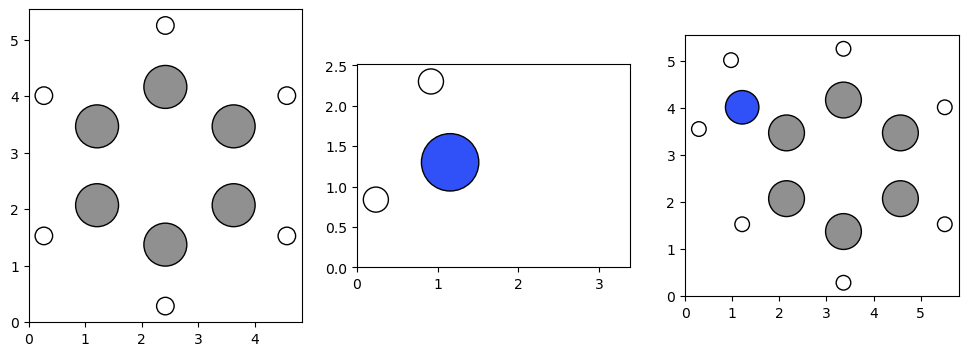

In [16]:
from ase.build import molecule

benzene = molecule('C6H6')
amine = molecule('NH2')
ligma = molecule('C6H6')

amine.rotate(90, 'y')
amine.rotate(-25, 'z')
vec = get_components(ligma.get_positions()[5], ligma.get_positions()[11])
T = get_components(amine.get_positions()[0], ligma.get_positions()[11])
# ligma.pop(2)
ligma.pop()
# ligma.pop(len(ligma)-2)

amine.translate(T)
ligma.extend(amine)
write("/Users/adrianaladera/Desktop/yourmom/ass2.html", ligma)
# ligand = attach.attach(ligma, amine, distance=1.4, direction=(vec[0],vec[1],vec[2]), maxiter=50, accuracy=1e-05)

fig, ax = plt.subplots(1,3, figsize=(12,8))
plot_atoms(benzene, ax[0], radii=0.5, rotation=('0x,0y,0z'))
plot_atoms(amine, ax[1], radii=0.5, rotation=('0x,00y,0z'))
plot_atoms(ligma, ax[2], radii=0.5, rotation=('0x,0y,0z'))
# view(ligand, viewer='x3d')

## Make benzmethoxy (test)

In [17]:
from ase.build import molecule

ligma = molecule('C6H6')
meth = molecule('CH3')
O = Atoms('O', [[0,0,1]])
meth.extend(O)
meth.rotate(90, 'x')

meth_v = get_components(meth.get_positions()[4], meth.get_positions()[0])
T = get_components(meth.get_positions()[4], ligma.get_positions()[11])
ligma.pop()
# ligma.pop(len(ligma)-2)

meth.translate(T)
ligma.extend(meth)

print(ligma.get_chemical_symbols())
write("/Users/adrianaladera/Desktop/yourmom/ass2.html", ligma)

# view(ligma, viewer='x3d')


['C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'C', 'H', 'H', 'H', 'O']


## Make $C_4H_9$

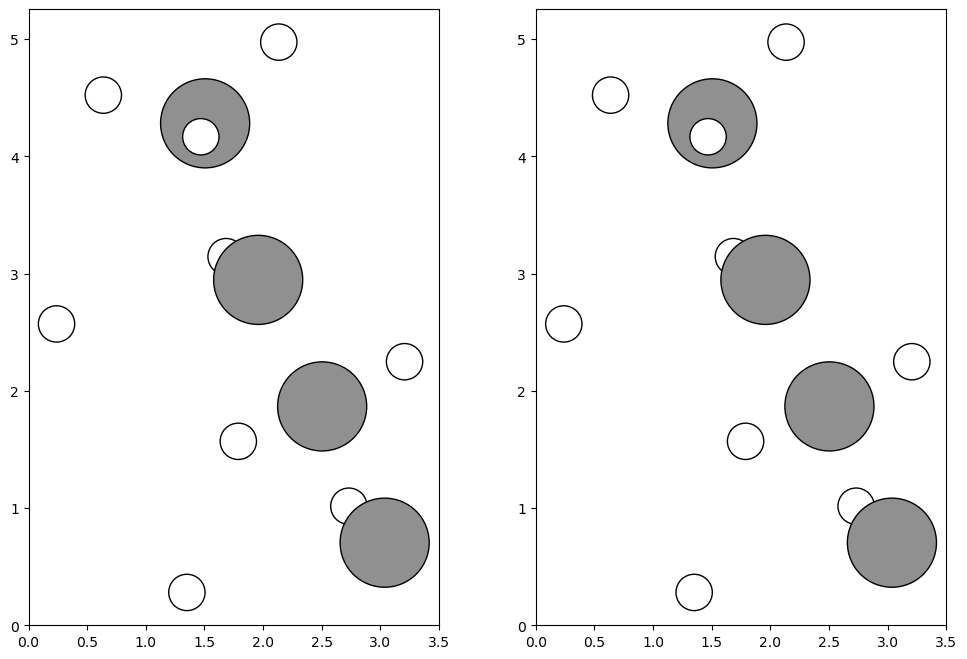

In [202]:
butyl = Atoms('C4H9', positions=[(2.315422400,        1.619381580,         1.273460524),
     (2.848532674,        0.456826764,         0.483823801),
     (1.769668814,        2.698677385,         0.273862488),
     (1.317172749,        4.033918648,         0.935696778),
     (1.600249042,        1.321527236,         1.856272030),
     (3.018312362,        2.000588676,         1.819063210),
     (1.161546900,        0.032479303,         -0.555227764),#4
     (2.543147880,        0.768095039,         -0.409738249),#4
     (0.049726205,        2.322804249,         -0.354230811),#4
     (1.496151660,        2.896866476,         -0.188129098),#4
     (1.280509888,        3.919297358,         1.888952991),
     (1.945518626,        4.726702808,         0.721299066),
     (0.448734212,        4.274477971,         0.608403725)])

fig, ax = plt.subplots(1,2, figsize=(12,8))
plot_atoms(butyl, ax[0], radii=0.5, rotation=('0x,0y,0z'))
plot_atoms(butyl, ax[1], radii=0.5, rotation=('0x,0y,0z'))
# view(butyl, viewer='x3d')
write("/Users/adrianaladera/Desktop/yourmom/ass.html", butyl)

## Rotate benzene into 3-methoxy (success!)

In [3]:
import numpy as np
import copy as cp

path = "/Users/adrianaladera/Desktop/MIT/research/MOChAs/original_structures/mithrene/"
if os.path.exists("{}POSCAR.vasp".format(path)):
    os.rename("{}POSCAR.vasp".format(path), "{}POSCAR".format(path))
    print("changing to POSCAR")

mocha = read(f'{path}POSCAR')
mocha_pos = mocha.get_positions()

####### 3-METHOXY INORGANIC
# attach_vecs = [(41, 53), (34,54), (40,52), (35,55)] #(p0, p1), to attach to S site
# rotate_vecs = [(39, 47), (48, 58),(36,32),(49,59)] #(p0,p1), to rotate after being attached

##### MITHRENE INORGANIC
attach_vecs = [(16,40),(20,44),(22,46),(18,42),(19,43),(23,47),(21,45),(17,41)] #(p0, p1), to attach to S site
rotate_vecs = [(24,48),(28,52), (30,54),(26,50),(27,51),(31,55),(29,53),(25,49)] #(p0,p1), to rotate after being attached

##### THIORENE INORGANIC
# attach_vecs = [(16,28),(18,30),()]
# rotate_vecs = [()]

while True:
    for i in range(len(mocha)):
        if mocha.get_chemical_symbols()[i] == 'C' or mocha.get_chemical_symbols()[i] == 'H' or mocha.get_chemical_symbols()[i] == 'O':
            mocha.pop(i)
            break
    # if 'C' and 'H' and 'O' not in mocha.get_chemical_symbols(): # benzeth
    if 'C' and 'H' not in mocha.get_chemical_symbols(): # benzene
        break

cunt = 0
for a,r in zip(attach_vecs, rotate_vecs):
    cunt += 1
    ###### BENZAMINE
    # amine = molecule('NH2')
    # ligma = molecule('C6H6')
    # amine.rotate(90, 'y')
    # amine.rotate(-25, 'z')
    # vec = get_components(ligma.get_positions()[5], ligma.get_positions()[11])
    # T = get_components(amine.get_positions()[0], ligma.get_positions()[11])
    # ligma.pop()
    # ligma.pop(len(ligma)-2)
    # amine.translate(T)
    # ligma.extend(amine)

    # if cunt == 1:
    #     mocha.extend(ligma)

    ######## BENZENE
    ligma = molecule('C6H6')
    ligma.pop(9)

    ######## BENZMETH
    # ligma = molecule('C6H6')
    # meth = molecule('CH3')
    # O = Atoms('O', [[0,0,1]])
    # meth.extend(O)
    # meth.rotate(345, 'x')
    # meth.rotate(270,'-y')
    # meth_v = get_components(meth.get_positions()[4], meth.get_positions()[0])
    # T = get_components(meth.get_positions()[4], ligma.get_positions()[11])
    # ligma.pop()
    # ligma.pop(len(ligma)-2)
    # meth.translate(T)
    # ligma.extend(meth)

    lig_avec = get_components(ligma.get_positions()[3], ligma.get_positions()[0])
    lig_rvec = get_components(ligma.get_positions()[2], ligma.get_positions()[5])
    at_vec = get_components(mocha_pos[a[0]], mocha_pos[a[1]])
    rot_vec = get_components(mocha_pos[r[0]], mocha_pos[r[1]])
    angle = get_angle(lig_rvec, rot_vec)
    print(r, angle)
    ligma.rotate(lig_avec, at_vec)

    ##### 3-METH INORGANIC
    # if r[0] == 48 or r[0] == 49:
    #     ligma.rotate(angle, at_vec)
    # else:
    #     ligma.rotate(-angle, at_vec)

    ##### MITHRENE INORGANIC (yes this shit is ugly)
    if angle < 90:
        angle = 180 - angle    
    ligma.rotate(angle, at_vec)
    if a[0] == 22 or a[0] == 23:
        ligma.rotate(160, at_vec)
    elif a[0] == 18 or a[0] == 19:
        ligma.rotate(215, at_vec)
    elif a[0] == 20:
        ligma.rotate(10, at_vec)
    elif a[0] == 17:
        ligma.rotate(45, at_vec)
    elif a[0] == 21:
        ligma.rotate(60, at_vec)
    if a[0] == 19 or a[0] == 23:
        ligma.rotate(60, at_vec)
    
    ligma.rotate(45,at_vec)

    T = get_components(ligma.get_positions()[3], mocha_pos[a[0]])
    ligma.translate(T)
    
    mocha.extend(ligma)
    cunt += 1

write(f"{path}orient1.cif", mocha)
# write("/Users/adrianaladera/Desktop/yourmom/yourmom.cif", mocha)

(24, 48) 141.15169771524157
(28, 52) 125.38485602314053
(30, 54) 15.99738191539115
(26, 50) 98.42037220776746
(27, 51) 81.57962592652524
(31, 55) 164.00262041304774
(29, 53) 54.61514899090646
(25, 49) 38.848300622683645


## shipping a $C_4$ mocha with other ligands and letting them elope together

In [12]:
import numpy as np
import copy as cp

path = "/Users/adrianaladera/Desktop/MIT/research/MOChAs/prototype_structures/c4_benzene/"
if os.path.exists("{}POSCAR.vasp".format(path)):
    os.rename("{}POSCAR.vasp".format(path), "{}POSCAR".format(path))
    print("changing to POSCAR")

mocha = read(f'{path}POSCAR')
mocha_pos = mocha.get_positions()

##### MITHRENE INORGANIC
# attach_vecs = [(6,14),(5,13),(4,12),(7,15)] #(p0, p1), to attach to S site
attach_vecs = [(14,10),(13,9),(12,8),(15,11)]
# rotate_vecs = [(24,48),(28,52), (30,54),(26,50),(27,51),(31,55),(29,53),(25,49)] #(p0,p1), to rotate after being attached

while True:
    for i in range(len(mocha)):
        if mocha.get_chemical_symbols()[i] == 'C' or mocha.get_chemical_symbols()[i] == 'H' or mocha.get_chemical_symbols()[i] == 'O':
            mocha.pop(i)
            break
    # if 'C' and 'H' and 'O' not in mocha.get_chemical_symbols(): # benzeth
    if 'C' and 'H' not in mocha.get_chemical_symbols(): # benzene
        break

cunt = 0
# for a,r in zip(attach_vecs, rotate_vecs):
for a in attach_vecs:
    cunt += 1
    ###### BENZAMINE
    # amine = molecule('NH2')
    # ligma = molecule('C6H6')
    # # print(ligma.get_positions())
    # amine.rotate(90, 'y')
    # amine.rotate(-25, 'z')
    # vec = get_components(ligma.get_positions()[5], ligma.get_positions()[11])
    # T = get_components(amine.get_positions()[0], ligma.get_positions()[11])
    # ligma.pop()
    # ligma.pop(len(ligma)-2)
    # amine.translate(T)
    # ligma.extend(amine)
    # print(ligma.get_positions())

    # if cunt == 1:
    #     mocha.extend(ligma)

    ######## BENZENE
    ligma = molecule('C6H6')
    ligma.pop(9)
    # ligma.rotate(90, at_vec)

    ######## BENZMETH
    # ligma = molecule('C6H6')
    # meth = molecule('CH3')
    # O = Atoms('O', [[0,0,1]])
    # meth.extend(O)
    # meth.rotate(345, 'x')
    # meth.rotate(270,'-y')
    # meth_v = get_components(meth.get_positions()[4], meth.get_positions()[0])
    # T = get_components(meth.get_positions()[4], ligma.get_positions()[11])
    # ligma.pop()
    # ligma.pop(len(ligma)-2)
    # meth.translate(T)
    # ligma.extend(meth)

    lig_avec = get_components(ligma.get_positions()[3], ligma.get_positions()[0])
    # lig_rvec = get_components(ligma.get_positions()[2], ligma.get_positions()[5])
    at_vec = get_components(mocha_pos[a[0]], mocha_pos[a[1]])
    # rot_vec = get_components(mocha_pos[r[0]], mocha_pos[r[1]])
    # angle = get_angle(lig_rvec, rot_vec)
    # print(r, angle)
    # ligma.rotate(lig_avec, at_vec)

    # ligma.rotate(90, at_vec)
    # ligma.rotate(30, 'x')

    ##### 3-METH INORGANIC
    # if r[0] == 48 or r[0] == 49:
    #     ligma.rotate(angle, at_vec)
    # else:
    #     ligma.rotate(-angle, at_vec)

    ##### MITHRENE INORGANIC (yes this shit is ugly)
    # if angle < 90:
    #     angle = 180 - angle    
    # ligma.rotate(angle, at_vec)
    # if a[0] == 22 or a[0] == 23:
    #     ligma.rotate(160, at_vec)
    # elif a[0] == 18 or a[0] == 19:
    #     ligma.rotate(215, at_vec)
    # elif a[0] == 20:
    #     ligma.rotate(10, at_vec)
    # elif a[0] == 17:
    #     ligma.rotate(45, at_vec)
    # elif a[0] == 21:
    #     ligma.rotate(60, at_vec)
    # if a[0] == 19 or a[0] == 23:
    #     ligma.rotate(60, at_vec)

    T = get_components(ligma.get_positions()[3], mocha_pos[a[0]])
    ligma.translate(T)
    
    mocha.extend(ligma)
    cunt += 1

write(f"{path}yourmom2.cif", mocha)
# write("/Users/adrianaladera/Desktop/yourmom/yourmom.cif", mocha)

## replace amine in 3-amino with methoxy 

In [4]:
import numpy as np
import copy as cp

path = "/Users/adrianaladera/Desktop/MIT/research/MOChAs/prototype_structures/mithrene_amine/"
dest = "/Users/adrianaladera/Desktop/yourmom/"
if os.path.exists("{}POSCAR.vasp".format(path)):
    os.rename("{}POSCAR.vasp".format(path), "{}POSCAR".format(path))
    print("changing to POSCAR")

mocha = read(f'{path}POSCAR')
mocha_pos = mocha.get_positions()

# 3-meth benzene and benzamine
attach_vecs = [(41, 53), (34,54), (40,52), (35,55)] #(p0, p1), to attach to C site in benzene i.e. CO in C-OHC3

while True:
    for i in range(len(mocha)):
        if mocha.get_chemical_symbols()[i] == 'C' or mocha.get_chemical_symbols()[i] == 'H' or mocha.get_chemical_symbols()[i] == 'O':
            mocha.pop(i)
            break
    if 'N' not in mocha.get_chemical_symbols(): # remove N from structure
        break
cunt = 0

for a,r in zip(attach_vecs, rotate_vecs):
    ######## BENZMETH
    ligma = molecule('C6H6')
    meth = molecule('CH3')
    O = Atoms('O', [[0,0,1]])
    meth.extend(O)
    meth.rotate(345, 'x')
    meth.rotate(270,'-y')
    meth_v = get_components(meth.get_positions()[4], meth.get_positions()[0])
    T = get_components(meth.get_positions()[4], ligma.get_positions()[11])
    ligma.pop()
    ligma.pop(len(ligma)-2)
    meth.translate(T)
    ligma.extend(meth)

    lig_avec = get_components(ligma.get_positions()[3], ligma.get_positions()[0])
    lig_rvec = get_components(ligma.get_positions()[2], ligma.get_positions()[5])
    at_vec = get_components(mocha_pos[a[0]], mocha_pos[a[1]])
    rot_vec = get_components(mocha_pos[r[0]], mocha_pos[r[1]])
    angle = get_angle(lig_rvec, rot_vec)
    
    ligma.rotate(lig_avec, at_vec)
    ligma.rotate(angle, at_vec)
    T = get_components(ligma.get_positions()[len(ligma)-1], mocha_pos[a[0]]) #lig attach is O for methoxy
    ligma.translate(T)
    
    mocha.extend(ligma)
    cunt += 1

write(f"{dest}yourmom.cif", mocha)
# write("/Users/adrianaladera/Desktop/yourmom/yourmom.cif", mocha)

KeyboardInterrupt: 